<a href="https://colab.research.google.com/github/dallinmoore/DATA_5630_Deep_Forecasting/blob/main/Homework(my-branch-only)/HW_4_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 4 - DATA 5630
Alesandro Rodriguez & Dallin Moore

## Question 1

### 1

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 312.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 80.4 MB/s eta 0:00:00
   ━━━

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from pycaret.time_series import *

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/US_macro_Quarterly.csv", index_col=0)
df.head()

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### 2

In [ ]:
df.index = pd.to_datetime(df.index).to_period('Q')
df.index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

### 3

In [ ]:
df = df.loc[:, ['cpi']]
df.head()

,cpi
1959Q1,28.98
1959Q2,29.15
1959Q3,29.35
1959Q4,29.37
1960Q1,29.54


### 4

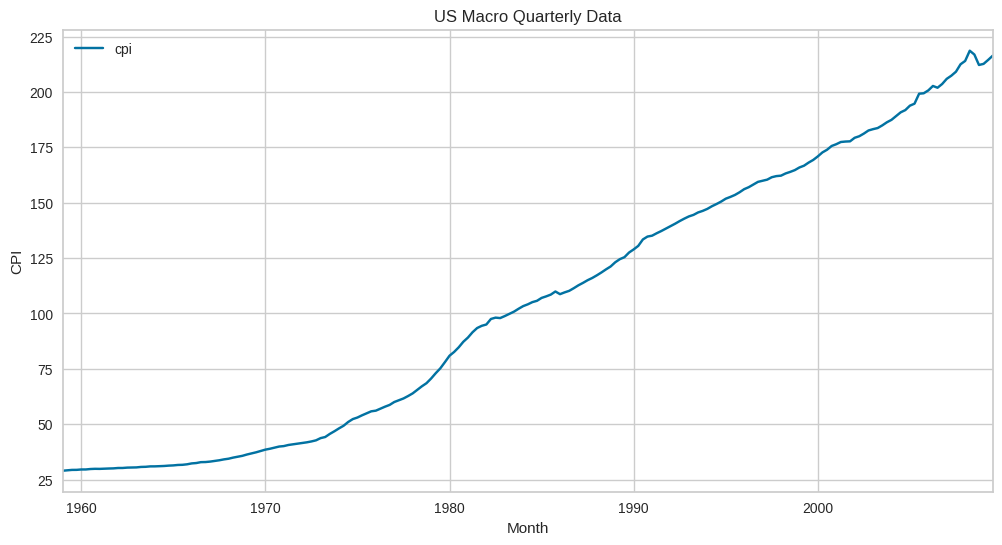

In [ ]:
df.plot(figsize=(12,6))
#adding months to the x-axis
plt.xlabel('Month')
plt.ylabel('CPI')
plt.title('US Macro Quarterly Data')
plt.show()

The dataset is not stationary, it has a strong upwards trend. Differencing will probably take care of it. Since we are using an ARIMA model, the non-stationarity will be taken care of.

### 5

In [ ]:
exp = TSForecastingExperiment()
exp.setup(data = df, target='cpi',  fh = 24)

,Description,Value
0,session_id,275
1,Target,cpi
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(203, 1)"
5,Transformed data shape,"(203, 1)"
6,Transformed train set shape,"(179, 1)"
7,Transformed test set shape,"(24, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


There are 179 in-sample observations, with 24 hold out observations.

### 6 & 7

In [ ]:
exp.plot_model(plot="diff", data_kwargs={"order_list": [1,2], "acf": True, "pacf": True})

Based on the stationarity check and seasonality detection, ARIMA(1,1,1) is a reasonable choice. The differencing plot and ADF test confirmed that one difference (d=1) was enough to make the series stationary. The PACF plot shows a significant spike at lag 1, suggesting an autoregressive process of order p=1. Similarly, the ACF plot shows a strong correlation at lag 1, indicating a moving average process of order q=1. While a seasonal model like SARIMA(1,1,1)(0,1,0,4) may capture seasonality better, the ACF/PACF plots do not show strong seasonal spikes, supporting the use of ARIMA(1,1,1).

In [ ]:
arima111= exp.create_model('arima', order = (1,1,1), seasonal_order=(0,0,0,12) , with_intercept= True, cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.7905,2.7050,7.3620,8.5104,0.0353,0.0361,0.2681


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ARMA models assume stationarity. Since CPI is non-stationary (ADF test p-val > .05), we need differencing, making ARIMA more suitable.

In [ ]:
sarima1110104= exp.create_model('arima', order = (1,1,1), seasonal_order=(0,1,0,4) , with_intercept= True, cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.4443,2.3811,6.4486,7.4914,0.0309,0.0316,0.4329


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rwwd= exp.create_model('arima', order = (0,1,0), seasonal_order=(0,0,0,24) , with_intercept= True, cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.8597,2.7581,7.5445,8.6773,0.0362,0.0371,0.2391


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Because CPI has a clear upward trend. A model without drift probably doesn't capture the pattern well.

In [ ]:
my_models = [rwwd, arima111, sarima1110104]
my_model_lables = ['Random Walk with drift', 'ARIMA(1,1,1)', 'SARIMA(1,1,1)(0,1,0,4)']

### 8

In [ ]:
exp.compare_models(my_models, cross_validation=False)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
2,ARIMA,2.4443,2.3811,6.4486,7.4914,0.0309,0.0316,0.4329,0.1100
1,ARIMA,2.7905,2.7050,7.3620,8.5104,0.0353,0.0361,0.2681,0.2000
0,ARIMA,2.8597,2.7581,7.5445,8.6773,0.0362,0.0371,0.2391,0.0300


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

ARIMA(order=(1, 1, 1), seasonal_order=(0, 1, 0, 4))

ARIMA(1,1,1) has the highest hold-out R^2 (.4329), making it the best model

In [ ]:
arima111.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  179
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -107.775
Date:                Mon, 24 Feb 2025   AIC                            223.550
Time:                        18:34:23   BIC                            236.277
Sample:                    03-31-1959   HQIC                           228.711
                         - 09-30-2003                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0453      0.038      1.193      0.233      -0.029       0.120
ar.L1          0.9452      0.031     30.951      0.000       0.885       1.005
ma.L1         -0.5932      0.053    -11.203      0.000      -0.697      -0.489
sigma2         0.1954      0.012     16.125      0.000       0.172       0.219
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               158.69
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               5.89   Skew:                            -0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
sarima1110104.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  179
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 4)   Log Likelihood                -162.929
Date:                            Mon, 24 Feb 2025   AIC                            333.858
Time:                                    18:34:30   BIC                            346.495
Sample:                                03-31-1959   HQIC                           338.984
                                     - 09-30-2003                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0078      0.028      0.281      0.778      -0.046       0.062
ar.L1          0.5538      0.307      1.802      0.071      -0.048       1.156
ma.L1         -0.4175      0.340     -1.229      0.219      -1.083       0.248
sigma2         0.3809      0.025     15.209      0.000       0.332       0.430
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                84.17
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               8.42   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 9

Estimated formula for the ARIMA(1,1,1) model:

$$ (y_t - y_{t-1}) = 0.0453 + 0.9452 (y_{t-1} - y_{t-2}) - 0.5932 \varepsilon_{t-1} + \varepsilon_t $$

### 10

In [ ]:
exp.plot_model(my_models, plot='insample', data_kwargs={'labels':my_model_lables}, )

### 11

In [ ]:
exp.plot_model(my_models, plot='forecast', data_kwargs={'fh':36, 'labels':my_model_lables})

### 12

In [ ]:
exp.plot_model(arima111, plot='diagnostics')

In [ ]:
exp.check_stats(arima111, test = 'adf')

,Test,Test Name,Data,Property,Setting,Value
0,Stationarity,ADF,Residual,Stationarity,{'alpha': 0.05},True
1,Stationarity,ADF,Residual,p-value,{'alpha': 0.05},0.0
2,Stationarity,ADF,Residual,Test Statistic,{'alpha': 0.05},-6.338817
3,Stationarity,ADF,Residual,Critical Value 1%,{'alpha': 0.05},-3.46828
4,Stationarity,ADF,Residual,Critical Value 5%,{'alpha': 0.05},-2.878202
5,Stationarity,ADF,Residual,Critical Value 10%,{'alpha': 0.05},-2.575653


The residuals are stationry. The p-val for the adf test is 0.0, which is below our .05 significance threshold.

## Question 2
### 1

In [ ]:
auto_arima = exp.create_model('auto_arima', cross_validation=False, information_criterion='aic', start_p=0, start_q=0, max_p=2, max_q=2, seasonal=True, stepwise=False)
auto_ets = exp.create_model('ets', cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.3312,2.2491,6.1501,7.0761,0.0296,0.0301,0.4940


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.8143,2.7095,7.4246,8.5244,0.0356,0.0365,0.2657


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### 2

In [ ]:
my_models = [auto_ets, auto_arima, sarima1110104]
my_model_lables = ['Auto ETS', 'Auto ARIMA', 'SARIMA(1,1,1)(0,1,0,4)']

In [ ]:
exp.compare_models(my_models, cross_validation=False)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
1,Auto ARIMA,2.3312,2.2491,6.1501,7.0761,0.0296,0.0301,0.4940,29.2600
2,ARIMA,2.4443,2.3811,6.4486,7.4914,0.0309,0.0316,0.4329,0.1800
0,ETS,2.8143,2.7095,7.4246,8.5244,0.0356,0.0365,0.2657,0.1400


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

AutoARIMA(max_p=2, max_q=2, random_state=8623, sp=3, start_p=0, start_q=0,
          stepwise=False, suppress_warnings=True)

Auto ARIMA is our best model.

In [ ]:
exp.plot_model(auto_arima, plot='forecast', data_kwargs={'fh':36})


In [ ]:
r2_score(df['cpi'][-24:], auto_ets.predict(df.index[-24:]))

0.26565383420026445

In [ ]:
r2_score(df['cpi'][-24:], auto_arima.predict(df.index[-24:]))

0.4939919303818502

In [ ]:
r2_score(df['cpi'][-24:], sarima1110104.predict(df.index[-24:]))

0.4328493313417414

### 3

In [ ]:
my_best_model = exp.finalize_model(auto_arima)

### 4

In [ ]:
my_best_model.predict(pd.period_range(start='2025Q1', periods=1, freq='Q'))

,cpi
2025Q1,281.755391


Using our best model, the forecast for 'cpi' in 2025, quarter 1 is 281.755